In [ ]:
!pip install tensorflow


     |███████████████████████████▊    | 278.1 MB 9.8 MB/s eta 0:00:05IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

     |████████████████████████████████| 320.4 MB 26 kB/s 
     |████████████████████████████████| 2.9 MB 68.7 MB/s 
     |████████████████████████████████| 6.8 MB 72.7 MB/s 
     |████████████████████████████████| 3.8 MB 74.6 MB/s 
     |████████████████████████████████| 57 kB 13.5 MB/s 
     |████████████████████████████████| 65 kB 10.0 MB/s 
     |████████████████████████████████| 459 kB 97.2 MB/s 
     |████████████████████████████████| 42 kB 3.4 MB/s 
     |████████████████████████████████| 20.1 MB 52.1 MB/s 
     |████████████████████████████████| 298 kB 57.7 MB/s 
     |████████████████████

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import tensorflow_datasets as tfds


import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
datasets, metadata = tfds.load('fashion_mnist', as_supervised=True,with_info=True)
train_dataset, test_dataset = datasets['train'], datasets['test']

train_dataset

<PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>

In [ ]:
class_names = metadata.features['label'].names
print(f"classes : {class_names}")

classes : ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

print(f'train: {num_train_examples}')
print(f'test: {num_test_examples}')

train: 60000
test: 10000


In [ ]:
def normalize(images,labels):
    images = tf.cast(images,tf.float32)
    images /= 255
    return images,labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)    

unshaped: [[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.07058824]
  [0.3019608 ]
  [0.8901961 ]
  [0.8901961 ]
  [0.8156863 ]
  [0.8235294 ]
  [0.88235295]
  [0.84705883]
  [0.33333334]
  [0.1254902 ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.23921569]
  [0.39215687]
  [0.38039216]
  [0.3137255 ]
  [0.22352941]
  [0.45882353]
  [0.8901961 ]
  [0.93333334]
  [0.4509804 ]
  [0.19215687]
  [0.30588236]
  [0.41568628]
  [0.42352942]
  [0.2784314 ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.31764707]
  [0.4117647 ]
  [0.3137255 ]
  [0.270588

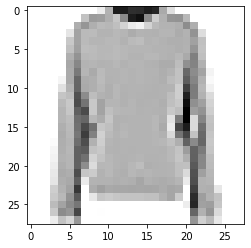

In [ ]:
for image,label in train_dataset.take(1):
    break

print(f"unshaped: {image}")
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image,cmap=plt.cm.binary)
plt.show()


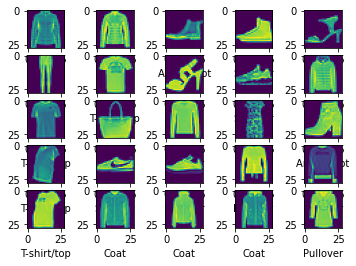

In [ ]:
i=0
for (img,label) in test_dataset.take(25):
    img = img.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.imshow(img)
    plt.xlabel(class_names[label])
    i += 1

plt.show()


In [ ]:
layer1 = Flatten(input_shape=(28,28,1))
layer2 = Dense(128,activation=tf.nn.relu)
output = Dense(10,activation = tf.nn.softmax)

model = Sequential([layer1,layer2,output])

model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(0.001), metrics=['accuracy'])

BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

history = model.fit(train_dataset,epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5


KernelInterrupted: Execution interrupted by the Jupyter kernel.